# Data Intelligence Exam

Alexander lolk | lolk@itu.dk | Date: 2025-06-12  

## Introduction

Here the student gives an introduction to the dataset and some social and cultural context.

They give an overview of the report the have written and the different steps they will go through.

## Loading and overview

Here the student starts explaining what the different steps do and why they use the individual blocks of code.

In [2]:
%pip install -U pandas 
%pip install -U matplotlib 
%pip install -U seaborn 
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import datetime
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.preprocessing

In [4]:

notebook_path = os.path.abspath("Notebook.ipynb")
# df = pd.read_csv(notebook_path)
df = pd.read_csv("..\\..\\dataExam\\shark-incidents.csv")
# print(notebook_path)

First lets look at what the dataset contains

In [5]:
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,fatal
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN,False
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN,False
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN,False
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

Looking at the data given, there seems to be alot "noise" to this data. So before even going into a looking at what we can do with this data, let's look into what is what.
With 23 columns, and some seems to be the same in name, and some which is not understandable just from reading.
It would be in our best intrest to remove some of the "noise" these column makes.  
so let's look at what these columns contains to better understand this dataset and remove unnecessary columns. 

In [7]:
def check_case_nan(dfc):
    filt = dfc[["Case Number", "Case Number.1"]]
    mask = filt.isna().any(axis=1)
    # print(mask.value_counts())
    # print(df[mask])
    
    # df[df["Case Number"].isna() == False]["Case Number"].head(10)
    nan_count_per_row = dfc[mask].isna().sum(axis=1)
    # print(nan_count_per_row)
    # return df[df.isna().sum(axis=1) < 20]
    return dfc.drop(columns=["Case Number", "Case Number.1"])
# removes rows which has almost nothing in them
# nevermind gonna remove them all
df = check_case_nan(df)

Since the columns case number and case number.1 is the mostly the same, and their purpose does not give the dataset any more information on what these case number stands for or have any special meaning. So, it shall be removed to minimize the noise.

In [8]:
def check_Unamed_nan(dfc):
    mask = dfc[["Unnamed: 11", "Unnamed: 21", "Unnamed: 22"]].isna().any(axis=1)
    # print(mask.value_counts())
    
    return dfc.drop(columns=["Unnamed: 11", "Unnamed: 21", "Unnamed: 22"])
# removes column which are almost not used
df = check_Unamed_nan(df)


I was not able to understand the columns with unnamed in them, and as such will remove them.

In [9]:
def check_href(dfc):
    # print(df["href"].value_counts())
    # print(df["href formula"].value_counts())
    return dfc.drop(columns=["href", "href formula"])
df = check_href(df)

The href and href formula seems like they are the same, and only give href, which is not very useful for much. Plus a href have a lot of text for very little usable info.

In [10]:
def check_pdf(dfc):
    # print(df["pdf"].isna().value_counts())
    return dfc.drop(columns=["pdf"])
df = check_pdf(df)

The name of the pdf that the row came from. Not very useful for much, so it well be removed

In [11]:
def check_time(dfc):
    # print(df["Time"].value_counts())
    # print(df[df["Time"].isna() == False]["Time"])
    return dfc.drop(columns="Time")
df = check_time(df) 


while time could normally be very useful, here in this dataset the data is so different from each other that it makes it hard to use.
It could maybe be changed for better use, it will not be a factor in this handin and as so will be removed.

In [12]:
def check_original_order(dfc):
    # df["original order"].notna().sum()
    # print(df["original order"].tail(30))
    # print(df)
    return dfc.drop(columns="original order")
df = check_original_order(df)

Original order is what the names says it is, and comes out as the reverse of what pandas index the rows as. Meaning that the tail starts from 1 and counting up while going backwards.
This is a not data that is useful for much, and can be created if need, so it will be removed.

In [13]:
def check_source(dfc):
    # print(df["Source"].value_counts())
    # print(df["Source"].isna())
    return dfc.drop(columns="Source")
df = check_source(df)

Sources could have been another protential good column, but it data contain not much of a formular to make it easy to use and work with, so it will be removed. 

Making a reset function for future fuck ups

In [14]:
def reset_func():
    dfcopy = pd.read_csv("..\\..\\dataExam\\shark-incidents.csv")
    dfcopy = check_case_nan(dfcopy)
    dfcopy = check_Unamed_nan(dfcopy)
    dfcopy = check_href(dfcopy)
    dfcopy = check_pdf(dfcopy)
    dfcopy = check_time(dfcopy)
    dfcopy = check_original_order(dfcopy)
    dfcopy = check_source(dfcopy)
    return dfcopy

# Exploration
Something something, 

In [15]:
df = reset_func()
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Species,fatal
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",Tiger shark,False
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",Tiger shark 8',False
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,3' to 4' shark,False
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,Tiger shark,False
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,"Bull shark, 7'",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Okay now it is much easier to read. But there seem to be a some empty rows, now that we deleted some columns.
so lets see how many of these there is.

In [16]:
columnCount = len(df.columns)
#df[df.isna().sum(axis=1) > (columnCount - 2)]
df = df.dropna(thresh=(columnCount - 2))
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Species,fatal
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",Tiger shark,False
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",Tiger shark 8',False
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,3' to 4' shark,False
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,Tiger shark,False
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,"Bull shark, 7'",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,Before 19-Jul-1913,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,"FATAL, leg stripped of flesh",NaN,True
6938,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Said to involve a grey nurse shark that leapt ...,True
6939,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,NaN,True
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,NaN,True


There seems to be a big range for when the the these attacks happens. Let have a look at the distribution of the data on the yeah column.

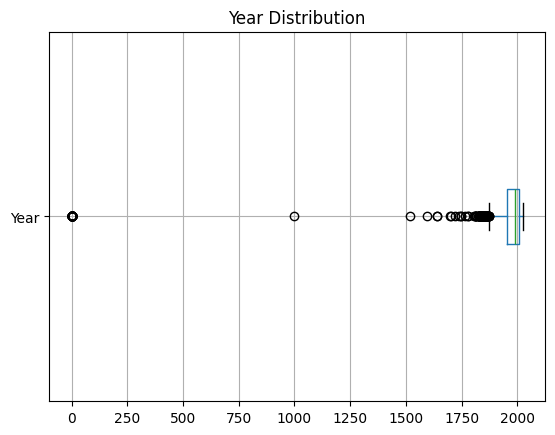

In [26]:
tmp_df = pd.DataFrame(df, columns=["Year"])
tmp_df.boxplot(vert=False)
plt.title('Year Distribution')
plt.show()

the plot shows that while there is some outliers which are before around 1900. But the wast majority is after that.
To make it bit more readable, let's remove some of the outliers and only look at overwhelming amount of data.


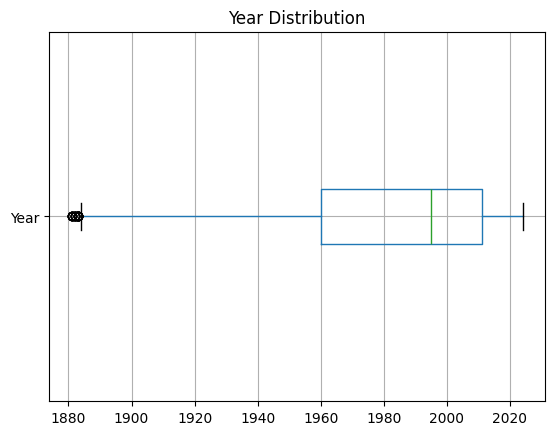

In [30]:
tmpdf = df[df["Year"] > 1880]

tmp_df = pd.DataFrame(tmpdf, columns=["Year"])
tmp_df.boxplot(vert=False)
plt.title('Year Distribution')
plt.show()

The boxplot shows the same amount of data is distributed in a smaller year range as the years goes by. Meaning that 25% of the sliced data is around 1880 to 1960 while as another 25% is only around the 2010 to 2024. So from that we can understand that there is more shark attacks in modern day compared to the ninetinhundered.